# MiniProjeto 2 - Convolutional Neural Networks - Redes Neurais

## Reconhecimento de Dígitos com CNN

## Grupo: Josenildo Vicente de Araújo (jva@cin.ufpe.br), Lucas Thierry Chaves Muniz (ltcm@cin.ufpe.br), Nicholas Henrique Justino Ferreira (nhjf@cin.ufpe.br), Renato Joaquim Miranda Ferreira (rjmf@cin.ufpe.br)

O seguinte MiniProjeto tem como objetivo praticar os conceitos e teorias aprendidas na disciplina de Redes Neurais a respeito do funcionamento do modelo de Redes Neurais Convolucionais. De maneira a variar os parâmetros do modelo treinado e observar seus resultados. A rede utilizada em questão, tem como função fazer o reconhecimento de dígitos escritos manualmente por 250 pessoas, entre as quais eram estudantes do Ensino Médio e funcionários do Departamento do Censo dos Estados Unidos. O conjunto desses dígitos está reunido no _dataset_ MNIST, que possuí 60000 imagens para treinamento do modelo da rede neural e 10000 imagens para teste do modelo da rede neural. Cada uma dessas imagens são formadas por 784 _pixels_ (28x28) em uma escala da cor cinza.


Começamos pela importação do pacote das bibliotecas do keras para construção do modelo, importação do dataset. O matplotlib será a biblioteca gráfica e será usada quando for pertinente

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
import matplotlib.pyplot as plt
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

Importação do dataset e separação entre os conjuntos de teste e treinamento

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

explorando o dataset

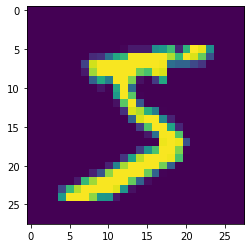

In [3]:
plt.imshow(X_train[0])

Reshape para treinamento do modelo do keras

In [4]:
#reshape data to fit model
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [5]:
#one-hot encode target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

Criação do modelo Sequencial, escolhemos o sequencial pois permite a criação do modelo layer a layer. 

Utilizamos 3 layers diferentes para lidar com o dataset, as 2 primeiras layers convolucionais de uma matriz com 2 dimensões, uma vez que o nosso dataset está de acordo com as 2 dimensões a serem vistas e utilizadas, bem como uma 'liga' representada pelo Flatten que serve para ligar as matrizes convolucionais com as camadas mais densas do modelo.

As camadas convolucionais são representadas pelos tamanhos 64 e 32, que são os números de nodes em cada layer, esse parâmetros podem ser ajustados dependendo do modelo.

As funções de ativação 'relu' e 'softmax' serão utilizadas em suas respectivas camadas.

A camada 'Dense' diz respeito a geração de outputs muito utilizadas nas mais diversas redes neurais, ela receberá 10 nodes, que representam o dígitos de 0-9 do nosso dataset. 

O modelo faz a predição baseado em qual foi o node que teve a maior probabilidade para uma dada amostra, em outras palavras, dada uma imagem X, será feita uma lista de probabilidades para tentar adivinhar qual foi o dígito fornecido.

In [6]:
def create_model():
    #create model
    model = Sequential()

    #add model layers
    model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
    model.add(Conv2D(32, kernel_size=3, activation='relu'))
    model.add(Flatten())
    model.add(Dense(10, activation='softmax'))

    #compile model using accuracy as a measure of model performance
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [7]:
model = KerasClassifier(build_fn=create_model, verbose=0)

Assim iniciamos o processo de busca grosseira utilizando Grid Search.

In [8]:
# define the grid search parameters
batch_size = [10, 20]
epochs = [10, 20, 30]
param_grid = dict(batch_size=batch_size, epochs=epochs)
# n_jobs needs to be set to your specific rig, -1 will eat your PC alive
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=None, cv=3)
grid_result = grid.fit(X_train, y_train)

In [9]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.974700 using {'batch_size': 20, 'epochs': 30}
0.968883 (0.001552) with: {'batch_size': 10, 'epochs': 10}
0.970467 (0.001513) with: {'batch_size': 10, 'epochs': 20}
0.972300 (0.002031) with: {'batch_size': 10, 'epochs': 30}
0.971317 (0.001088) with: {'batch_size': 20, 'epochs': 10}
0.974000 (0.000512) with: {'batch_size': 20, 'epochs': 20}
0.974700 (0.001662) with: {'batch_size': 20, 'epochs': 30}


Conseguimos perceber um ganho através do uso de mais epochs.

Adicionando Pooling e Filtros

In [6]:
def create_model_filter():
    #create model
    model = Sequential()

    #add model layers
    model.add(Conv2D(32, (5, 5), padding="same", activation="relu", input_shape=(28,28,1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (5, 5), padding="same", activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(10, activation='softmax'))

    #compile model using accuracy as a measure of model performance
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [7]:
model = KerasClassifier(build_fn=create_model_filter, verbose=0)

In [8]:
# define the grid search parameters
batch_size = [50, 100]
epochs = [10, 20]
param_grid = dict(batch_size=batch_size, epochs=epochs)
# n_jobs needs to be set to your specific rig, -1 will eat your PC alive
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=None, cv=3)
grid_result = grid.fit(X_train, y_train)

In [9]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.982683 using {'batch_size': 50, 'epochs': 20}
0.979667 (0.002705) with: {'batch_size': 50, 'epochs': 10}
0.982683 (0.000517) with: {'batch_size': 50, 'epochs': 20}
0.979683 (0.003029) with: {'batch_size': 100, 'epochs': 10}
0.981883 (0.002063) with: {'batch_size': 100, 'epochs': 20}


Vemos uma melhora de 97.5% para 98.2% e ainda conseguimos ver que o número de Epochs tem um efeito notável

Iniciamos experimentos com modelagem da rede, começando através da alteração do números de nós.

In [6]:
def create_model_net_expansion():
    #create model
    model = Sequential()

    #add model layers
    model.add(Conv2D(128, (5, 5), padding="same", activation="relu", input_shape=(28,28,1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(256, (5, 5), padding="same", activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(10, activation='softmax'))

    #compile model using accuracy as a measure of model performance
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [7]:
model1 = create_model_net_expansion()
model1.fit(X_train, y_train,validation_data=(X_test, y_test), epochs=100)

Epoch 1/100
1875/1875 [==============================] - 27s 13ms/step - loss: 0.4143 - accuracy: 0.9625 - val_loss: 0.0595 - val_accuracy: 0.9827
Epoch 2/100
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0658 - accuracy: 0.9812 - val_loss: 0.0636 - val_accuracy: 0.9819
Epoch 3/100
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0603 - accuracy: 0.9837 - val_loss: 0.0602 - val_accuracy: 0.9829
Epoch 4/100
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0598 - accuracy: 0.9839 - val_loss: 0.0727 - val_accuracy: 0.9830
Epoch 5/100
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0518 - accuracy: 0.9865 - val_loss: 0.0575 - val_accuracy: 0.9859
Epoch 6/100
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0480 - accuracy: 0.9878 - val_loss: 0.0640 - val_accuracy: 0.9850
Epoch 7/100
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0488 - accuracy: 0.9884 - val_loss: 0.0

Agora usando uma rede muito mais densa com 128 nós na primeira camada, fizemos um teste de estresse com 100 épocas (19 minutos), com uma acurácia de validação de 98.6% na época 9 e variações de 97.5% a 98.7% ao seu redor. Chegamos pela primeira vez a taxa de 99% na época 59 e até a época 100 só temos uma melhora até 99.1%. Assim definimos 59 épocas como um bom limiar de treinamento, muito próximo aos 60 definido pelo experimento original.

Adicionando 20% de Dropout entre camadas.

In [6]:
def create_model_dropout():
    #create model
    model = Sequential()

    #add model layers
    model.add(Conv2D(128, (5, 5), padding="same", activation="relu", input_shape=(28,28,1)))
    model.add(Dropout(0.2))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(256, (5, 5), padding="same", activation="relu"))
    model.add(Dropout(0.2))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(10, activation='softmax'))

    #compile model using accuracy as a measure of model performance
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [7]:
model1 = create_model_dropout()
model1.fit(X_train, y_train,validation_data=(X_test, y_test), epochs=59)

Epoch 1/59
1875/1875 [==============================] - 14s 7ms/step - loss: 0.6759 - accuracy: 0.9553 - val_loss: 0.0671 - val_accuracy: 0.9788
Epoch 2/59
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0778 - accuracy: 0.9776 - val_loss: 0.0809 - val_accuracy: 0.9754
Epoch 3/59
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0823 - accuracy: 0.9771 - val_loss: 0.0571 - val_accuracy: 0.9842
Epoch 4/59
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0799 - accuracy: 0.9791 - val_loss: 0.0594 - val_accuracy: 0.9840
Epoch 5/59
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0754 - accuracy: 0.9809 - val_loss: 0.0471 - val_accuracy: 0.9864
Epoch 6/59
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0723 - accuracy: 0.9817 - val_loss: 0.0708 - val_accuracy: 0.9820
Epoch 7/59
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0741 - accuracy: 0.9825 - val_loss: 0.0517 - val_ac

Com os 20% Dropout agora podemos ver um ganho pequeno indo para 99.1% na época 58, mas devido a margem de erro devemos considerar um empate. Notavelmente temos uma reduçao muito grande na perda entre treinamento e validação, no caso sem Dropout tivemos uma perda de 2.01 enquanto agora tivemos 0.93, o que mostra que Dropout tem uma influência notável evitando que a Rede se "vicie" nos dados obtidos através do treinamento.

Imprimindo uma matriz de confusão

In [9]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

predictions = model1.predict(X_test)
y_pred = (predictions > 0.5)
matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
print(matrix)
print("\n")
print(classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1)))


[[ 979    0    0    0    0    0    0    0    1    0]
 [   1 1126    2    2    1    0    3    0    0    0]
 [   1    0 1024    1    0    0    0    5    1    0]
 [   0    0    1 1005    0    3    0    1    0    0]
 [   0    0    0    0  970    0    1    4    1    6]
 [   1    0    0    7    0  881    1    0    0    2]
 [   3    2    1    0    2    0  948    0    2    0]
 [   0    2    3    0    0    0    0 1023    0    0]
 [   5    1    2    5    1    3    1    1  951    4]
 [   1    2    0    2    9    3    0    5    0  987]]


              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.98      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      1.00 

Com o uso de uma matriz de confusão, podemos ver onde existem o maior número de conflitos. Usando o nosso último modelo com Dropout, podemos ver que o maior números de "confusões" existe na previsão da classe 3 onde existem sete interpretações como se fosse a classe 5.

Testando strides maiores que o padrão 1

In [6]:
def create_model_strides():
    #create model
    model = Sequential()

    #add model layers
    model.add(Conv2D(128, (5, 5), strides=(2, 2), padding="same", activation="relu", input_shape=(28,28,1)))
    model.add(Dropout(0.2))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(256, (5, 5), strides=(2, 2), padding="same", activation="relu"))
    model.add(Dropout(0.2))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(10, activation='softmax'))

    #compile model using accuracy as a measure of model performance
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [7]:
model1 = create_model_strides()
model1.fit(X_train, y_train,validation_data=(X_test, y_test), epochs=59)

Epoch 1/59
1875/1875 [==============================] - 14s 4ms/step - loss: 0.5902 - accuracy: 0.9357 - val_loss: 0.0751 - val_accuracy: 0.9767
Epoch 2/59
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1132 - accuracy: 0.9677 - val_loss: 0.0999 - val_accuracy: 0.9721
Epoch 3/59
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1140 - accuracy: 0.9701 - val_loss: 0.0713 - val_accuracy: 0.9792
Epoch 4/59
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1193 - accuracy: 0.9701 - val_loss: 0.1107 - val_accuracy: 0.9732
Epoch 5/59
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1083 - accuracy: 0.9735 - val_loss: 0.0851 - val_accuracy: 0.9802
Epoch 6/59
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1075 - accuracy: 0.9745 - val_loss: 0.0730 - val_accuracy: 0.9810
Epoch 7/59
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1077 - accuracy: 0.9753 - val_loss: 0.0924 - val_accuracy

Podemos ver uma redução na acurácia de validação de 99.0 para 98.6% mais existe um ganho notável em velocidade de treinamento, onde antes eram processados um epoch numa média de 13s, agora temos um custo costante de 8s por Epoch.
Assim podemos dizer que o stride maior que 1 pode ser útil numa refinamento grosseiro de parâmetros, para menos custo de tempo do pesquisador e depois retirado no modelo final.

Assim o nosso melhor modelo acabou tendo 2 camadas convolucionais com filtros 5x5, função de ativação relu e dropout de 20%, a primeira camada com 128 nós e a segunda com 256.